# Métodos No Supervisados <a class="tocSkip">
### Laura Cristina López Bedoya <a class="tocSkip">
### Base de datos: credit-g. <a class="tocSkip">

In [1]:
# Importar librerias para la preparación y visualización de los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
#Leer el dataset
datos = pd.read_csv('credit-g.csv')
datos = datos.drop(['id'],axis=1) #Al pasar el archivo arff a csv aparece una nueva columna de id, se elimina
datos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


## Información de la tabla
#### Description of the German credit dataset.
- checking_status { '<0', '0<=X<200', '>=200', 'no checking'}
- duration
- credit_history { 'no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit'}
- purpose { 'new car', 'used car', furniture/equipment, radio/tv, 'domestic appliance', repairs, education, vacation, retraining, business, other}
- credit_amount
- savings_status { '<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings'}
- employment { unemployed, '<1', '1<=X<4', '4<=X<7', '>=7'}
- installment_commitment
- personal_status { 'male div/sep', 'female div/dep/mar', 'male single', 'male mar/wid', 'female single'}
- other_parties { none, 'co applicant', guarantor}
- residence_since
- property_magnitude { 'real estate', 'life insurance', car, 'no known property'}
- age
- other_payment_plans { bank, stores, none}
- housing { rent, own, 'for free'}
- existing_credits
- job { 'unemp/unskilled non res', 'unskilled resident', skilled, 'high qualif/self emp/mgmt'}
- num_dependents
- own_telephone { none, yes}
- foreign_worker { yes, no}
- class { good, bad}

# Descripción de datos

In [3]:
datos.dtypes #Conocer de que tipo son las variables

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [4]:
datos.shape #Número de filas y columnas del dataset.

(1000, 21)

In [5]:
datos.describe() #Descripción de los datos numéricos del dataset.

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
datos.describe(include='all') # Se realiza un resumen estadistico de todas las variables. 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [7]:
datos.dropna().shape #Se eliminan las filas y columnas donde hay datos faltantes

(1000, 21)

El dataset no tiene datos nulos.

In [8]:
datos.info() # Información general de los datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [9]:
datos.isnull().any(axis=0) #Verificar si las columnas tienen datos nulos. 

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool

Todos los datos estan completos.

# Visualización de datos

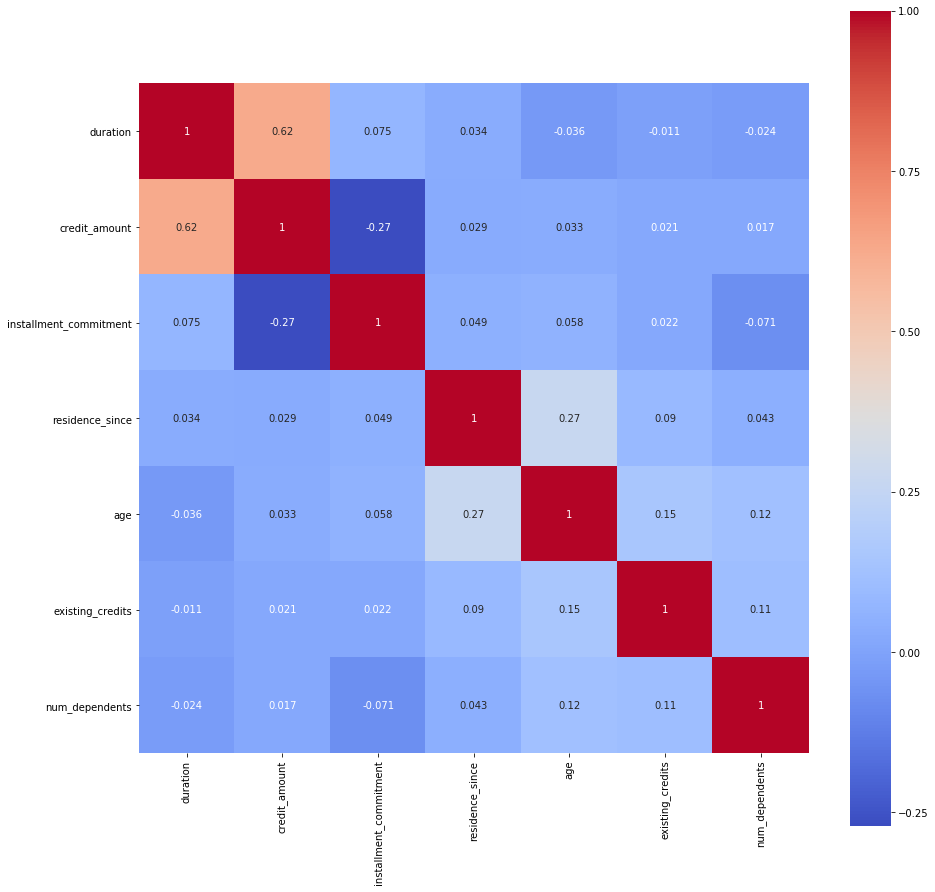

In [10]:
plt.figure(figsize=(15,15)) #Mapa de calor de la correlación de las variables numericas del dataset. 
sns.heatmap(datos.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Se observa que no hay variables muy correlacionadas, es decir, con correlacion mayor a 0.7.

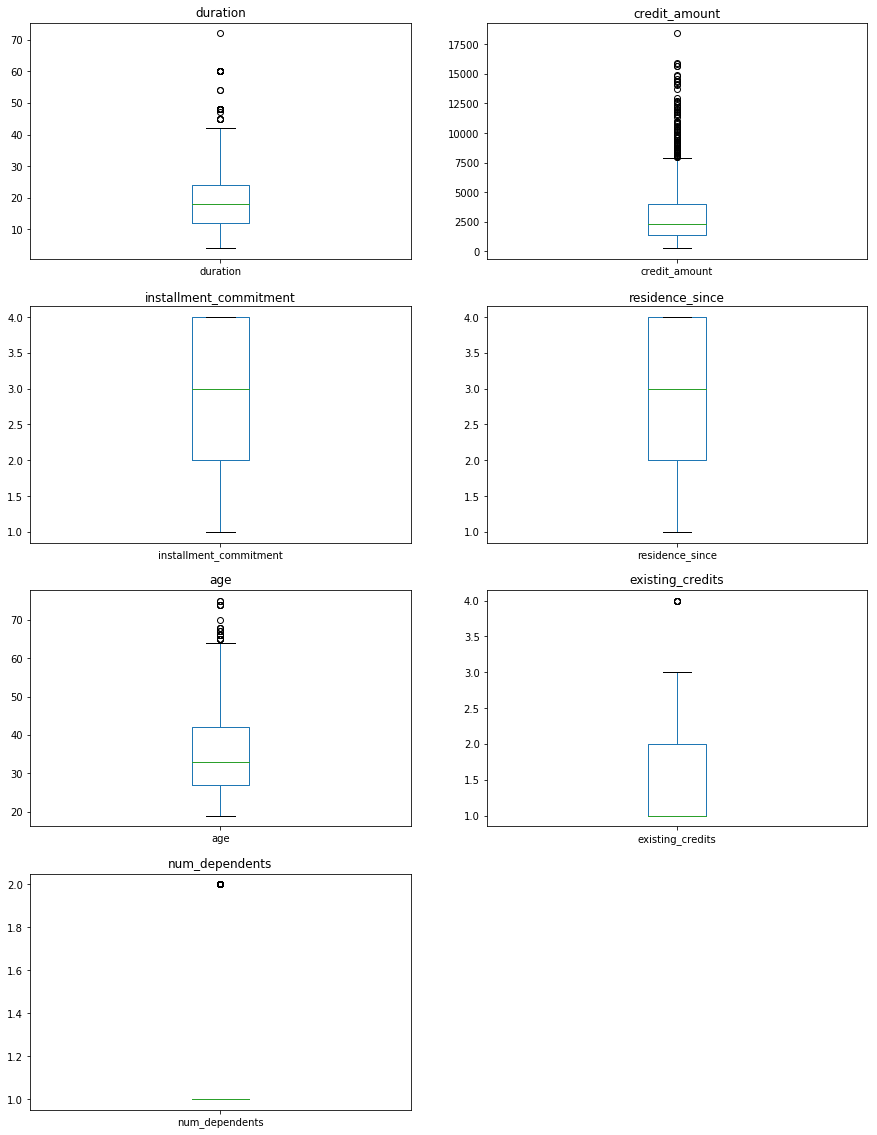

In [11]:
#Grafica boxplot de cada variable para identificar los datos atípicos
plt.figure(figsize=(15,20))
nom = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']

for i in range (0,len(nom)):
    plt.subplot(4,2,i+1)
    datos[nom[i]].plot.box(); 
    plt.title(nom[i]);

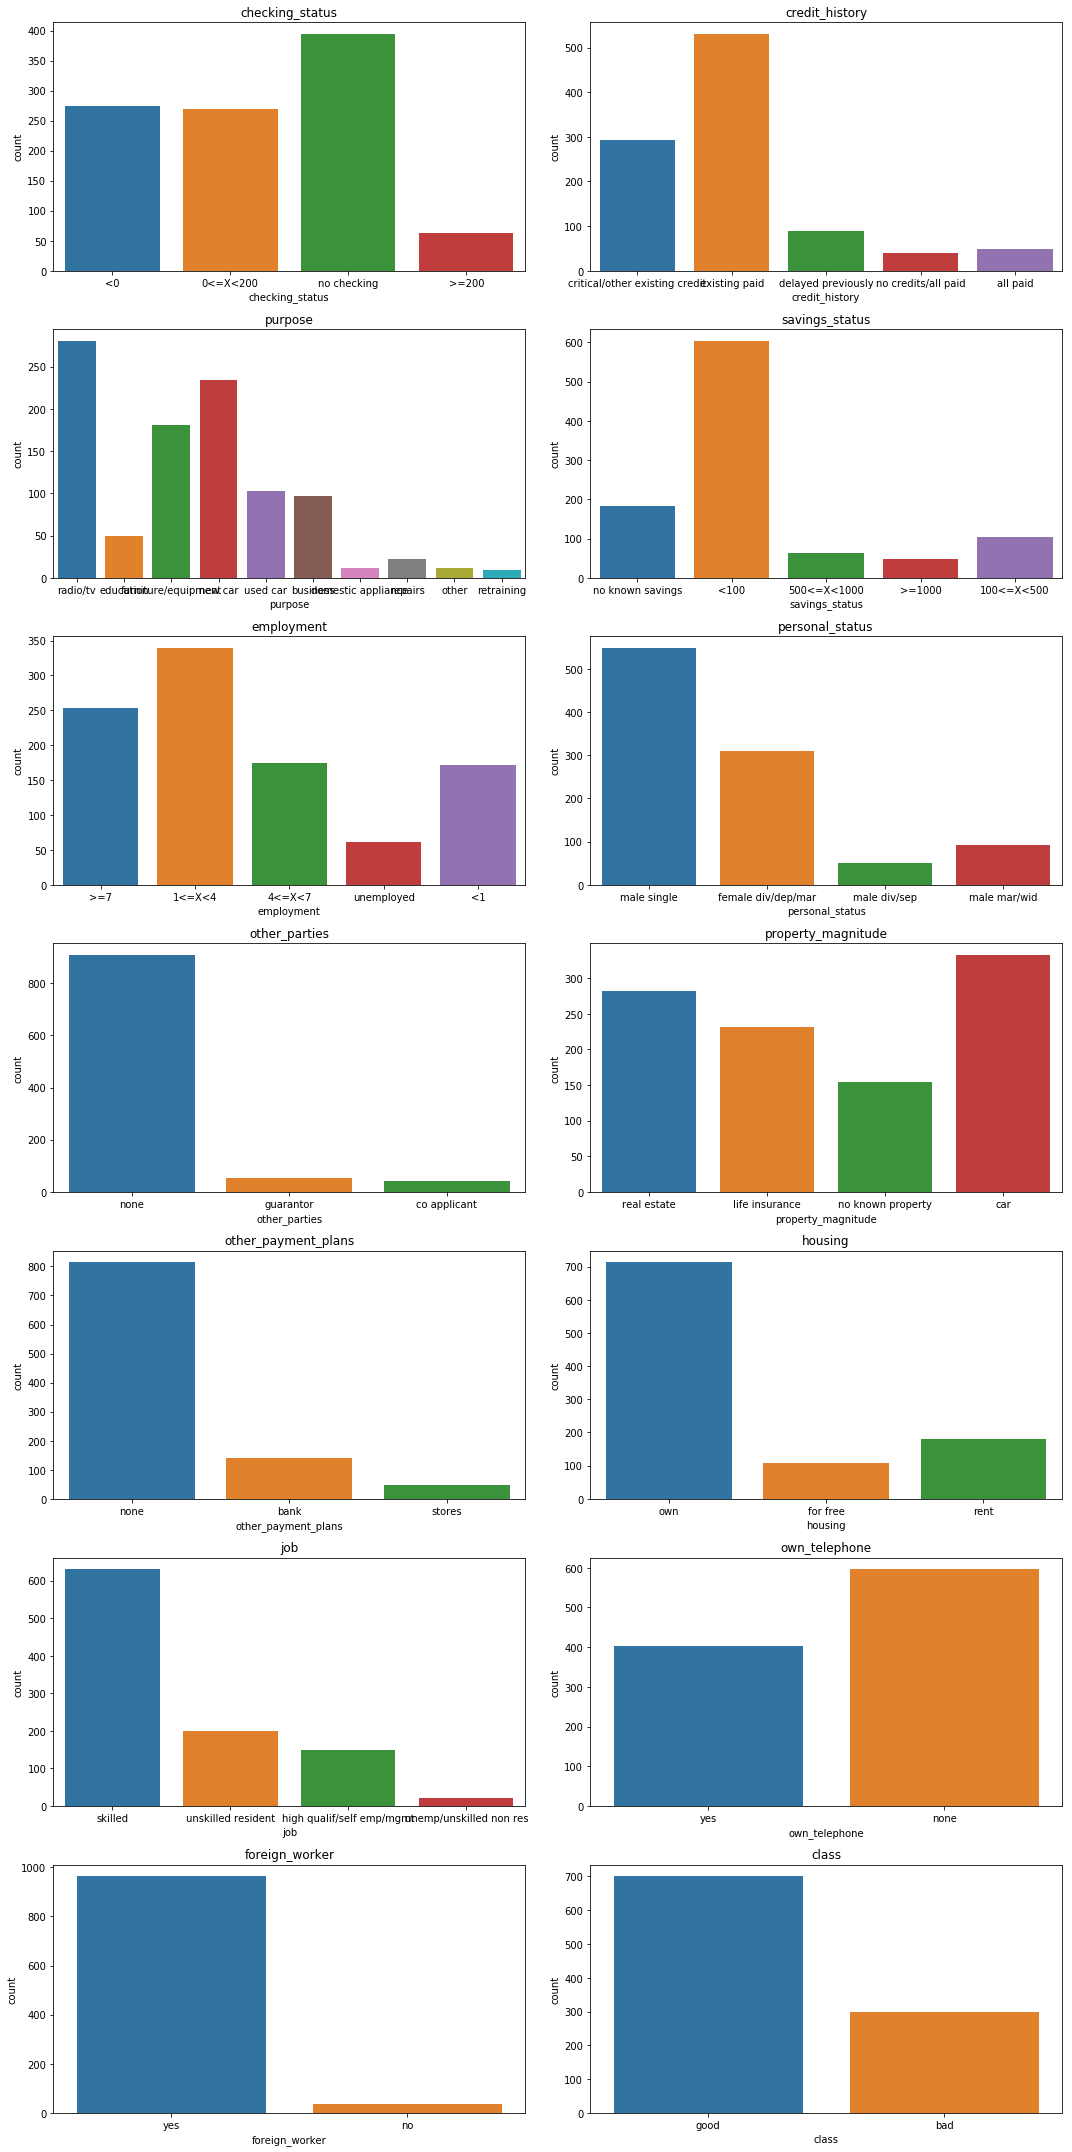

In [12]:
#Visualizar mediante histogramas las variables categoricas del dataset
plt.figure(figsize=(15,30))
nom2 = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties',
        'property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']

for j in range (0,len(nom2)):
    plt.subplot(7,2,j+1)
    sns.countplot(x=nom2[j],data=datos); 
    plt.title(nom2[j]);

plt.tight_layout()

## Preparación de datos
#### Transformación de variables
- Se identifican los cuartiles y el comportamiento de las variables con el fin de eliminar datos atípicos. 
- Dependiendo del comportamiento de la variable, los datos atípicos se pueden reducir al valor del cuartil superior o inferior, si el comportamiento es lineal se dividen por un número entero para re-escalar y si el comportamiento es exponencial se aplica logaritmo natural para reducirlo.

In [2]:
import warnings
warnings.filterwarnings('ignore')

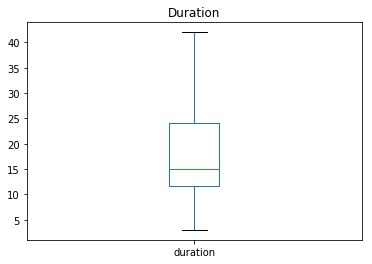

In [14]:
#La duracion presenta algunos puntos atípicos con crecimiento exponencial, por lo tanto se decide sacar logaritmo para reducirlos.
for x in range (0,len(datos)):
    if datos['duration'][x] > 43:
        datos['duration'][x] = math.log(datos['duration'][x])

datos['duration'].plot.box(); 
plt.title("Duration");

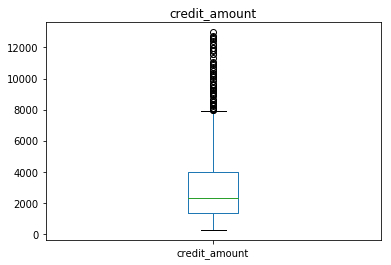

In [15]:
#Se observar muchos datos atípicos en el credit amount, sin embargo estos valores no son muy dispersos. 
#Se decide reducir al cuartil superior los valores mas alejado de los datos, es decir, valores superiores a 13500
for x in range (0,len(datos)):
    if datos['credit_amount'][x] > 13500:
        datos['credit_amount'][x] = (datos['credit_amount'].quantile(0.75) + (1.5 * datos['credit_amount'].quantile(0.5)))
        
datos['credit_amount'].plot.box(); 
plt.title("credit_amount");

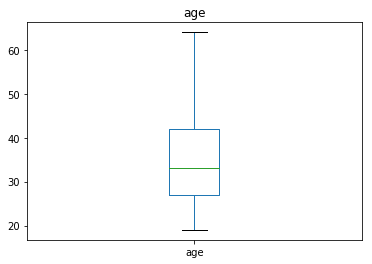

In [16]:
#Los vaores atípicos se reducen al valor del último cuartil.
for x in range (0,len(datos)):
    if datos['age'][x] > 64:
        datos['age'][x] = 64

datos['age'].plot.box(); 
plt.title("age");

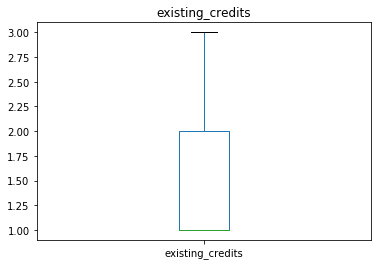

In [17]:
#Los valores atípicos se reducen al valor del último cuartil.
for x in range (0,len(datos)):
    if datos['existing_credits'][x] > 3:
        datos['existing_credits'][x] = 3

datos['existing_credits'].plot.box(); 
plt.title("existing_credits");

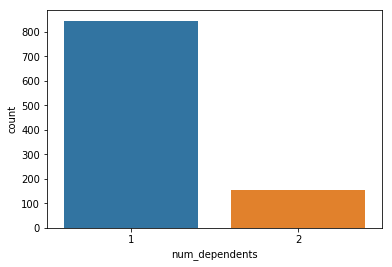

In [18]:
#Convertir de numérico a categórica la columna num_dependents
datos["num_dependents"] = datos["num_dependents"].astype('category') 
sns.countplot(x='num_dependents',data=datos); 

In [19]:
datos[datos.duplicated()] #Visualizar los valores duplicados en el dataset. El dataset no tiene duplicados

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


In [20]:
datos.describe() #Descripción de los datos numéricos del dataset luego de preparar los datos.

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.591000,3171.636000,2.973000,2.845000,35.442000,1.401000
std,9.635381,2518.291751,1.118715,1.103718,11.076431,0.555435
min,3.000000,250.000000,1.000000,1.000000,19.000000,1.000000
25%,11.750000,1365.500000,2.000000,2.000000,27.000000,1.000000
50%,15.000000,2319.500000,3.000000,3.000000,33.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000
max,42.000000,12976.000000,4.000000,4.000000,64.000000,3.000000


### Cantidad de clusters ideal para el conjunto de datos:
- La cantidad inicial de clusters definidos es de 10 teniendo en cuenta el propósito para el cual se solicitó el crédito.

# Metodos no supervisados

### Apriori

In [21]:
#definir un dataset con las variables categoricas del dataset inicial para aplicar el metodo apriori
dat = datos.copy()
dat.drop(['installment_commitment','residence_since','existing_credits','num_dependents','duration','credit_amount','age'],axis=1,inplace=True)
dat.head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad


In [22]:
dat.dtypes #comprobar que las variables son categoricas

checking_status        object
credit_history         object
purpose                object
savings_status         object
employment             object
personal_status        object
other_parties          object
property_magnitude     object
other_payment_plans    object
housing                object
job                    object
own_telephone          object
foreign_worker         object
class                  object
dtype: object

In [23]:
from apyori import apriori #Importar la libreria apriori e implementar el método
transactions = []
for i in range (0,1000):
    transactions.append([str(dat.values[i, j]) for j in range(0,14)])
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [ ]:
results = list(rules)
myResults = [list(x) for x in results]
myRes = []
for j in range(0, len(results)):
    myRes.append([list(x) for x in myResults[j][2]])

In [ ]:
myRes[0]

### K-means

In [24]:
#Convertir las variables categoricas en numericas para aplicar el método. 
mapping = {'<0': 1, '0<=X<200': 2,'no checking': 3,'>=200': 4,'critical/other existing credit': 1,'existing paid': 2,'delayed previously': 3,'no credits/all paid':4,'all paid':5,'new car':1, 'used car':2, 'furniture/equipment':3, 'radio/tv':4, 'domestic appliance':5, 'repairs':6, 'education':7, 'retraining':8, 'business':9, 'other':10,'no known savings':1,'<100':2,'500<=X<1000':3,'>=1000':4,'100<=X<500':5,'>=7':1,'1<=X<4':2,'4<=X<7':3,'unemployed':4,'<1':5,'male single':1,'female div/dep/mar':2,'male div/sep':3,'male mar/wid':4,'none':1,'guarantor':2,'co applicant':3,'real estate':1,'life insurance':2,'no known property':3,'car':4,'none':1,'bank':2,'stores':3,'own':1,'for free':2,'rent':3,'skilled':1,'unskilled resident':2,'high qualif/self emp/mgmt':3,'unemp/unskilled non res':4,'yes':2,'no':1,'good':1,'bad':2}
data = datos.replace({'checking_status':mapping,'credit_history':mapping,'purpose':mapping,'savings_status':mapping,'employment':mapping,'personal_status':mapping,'other_parties':mapping,'housing':mapping,'property_magnitude':mapping,'other_payment_plans':mapping,'job':mapping,'foreign_worker':mapping,'own_telephone':mapping,'class':mapping}).copy()
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,4,1169,1,1,4,1,1,...,1,64,1,1,2,1,1,2,2,1
1,2,3,2,4,5951,2,2,2,2,1,...,1,22,1,1,1,1,1,1,2,2
2,3,12,1,7,2096,2,3,2,1,1,...,1,49,1,1,1,2,2,1,2,1
3,1,42,2,3,7882,2,3,2,1,2,...,2,45,1,2,1,1,2,1,2,1
4,1,24,3,1,4870,2,2,3,1,1,...,3,53,1,2,2,1,2,1,2,2


In [4]:
from sklearn.cluster import KMeans #Importar libreria para K-Means

In [26]:
k_means = KMeans(n_clusters=9) #Definir el numero de clusters 
a = k_means.fit(data) #Entrenar K-means
labels = k_means.labels_ #Obtener los clusters

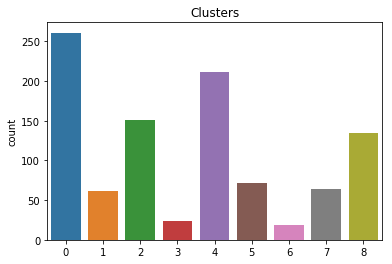

In [27]:
sns.countplot(x=labels); #Graficar el numero de clusters con el numero de usuarios que hacen parte de él.
plt.title("Clusters"); 

In [28]:
dataset = pd.read_csv('prueba1.csv') #Cargar archivo de prueba para probar los clusters
mapping = {'<0': 1, '0<=X<200': 2,'no checking': 3,'>=200': 4,'critical/other existing credit': 1,'existing paid': 2,'delayed previously': 3,'no credits/all paid':4,'all paid':5,'new car':1, 'used car':2, 'furniture/equipment':3, 'radio/tv':4, 'domestic appliance':5, 'repairs':6, 'education':7, 'retraining':8, 'business':9, 'other':10,'no known savings':1,'<100':2,'500<=X<1000':3,'>=1000':4,'100<=X<500':5,'>=7':1,'1<=X<4':2,'4<=X<7':3,'unemployed':4,'<1':5,'male single':1,'female div/dep/mar':2,'male div/sep':3,'male mar/wid':4,'none':1,'guarantor':2,'co applicant':3,'real estate':1,'life insurance':2,'no known property':3,'car':4,'none':1,'bank':2,'stores':3,'own':1,'for free':2,'rent':3,'skilled':1,'unskilled resident':2,'high qualif/self emp/mgmt':3,'unemp/unskilled non res':4,'yes':2,'no':1,'good':1,'bad':2}
dataset = dataset.replace({'checking_status':mapping,'credit_history':mapping,'purpose':mapping,'savings_status':mapping,'employment':mapping,'personal_status':mapping,'other_parties':mapping,'housing':mapping,'property_magnitude':mapping,'other_payment_plans':mapping,'job':mapping,'foreign_worker':mapping,'own_telephone':mapping,'class':mapping})
dataset

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,3,37,2,1,3250,2,2,2,1,1,...,1,32,1,1,1,1,1,2,2,1
1,1,6,1,2,530,1,1,1,2,2,...,2,20,2,2,3,2,2,1,2,2
2,2,15,3,7,2200,3,3,3,3,3,...,1,33,3,3,2,3,1,2,1,1
3,4,42,4,10,5850,4,4,2,4,1,...,3,42,1,2,2,4,1,2,1,1
4,1,30,5,1,6870,5,5,4,1,2,...,4,25,2,1,1,1,2,2,1,1
5,3,23,2,4,1400,2,2,2,1,1,...,1,23,1,1,1,1,1,2,2,2


In [29]:
y_pred = k_means.predict(dataset) #Predecir clusters para los datos de prueba cargados.
y_pred

array([2, 8, 4, 1, 1, 0])

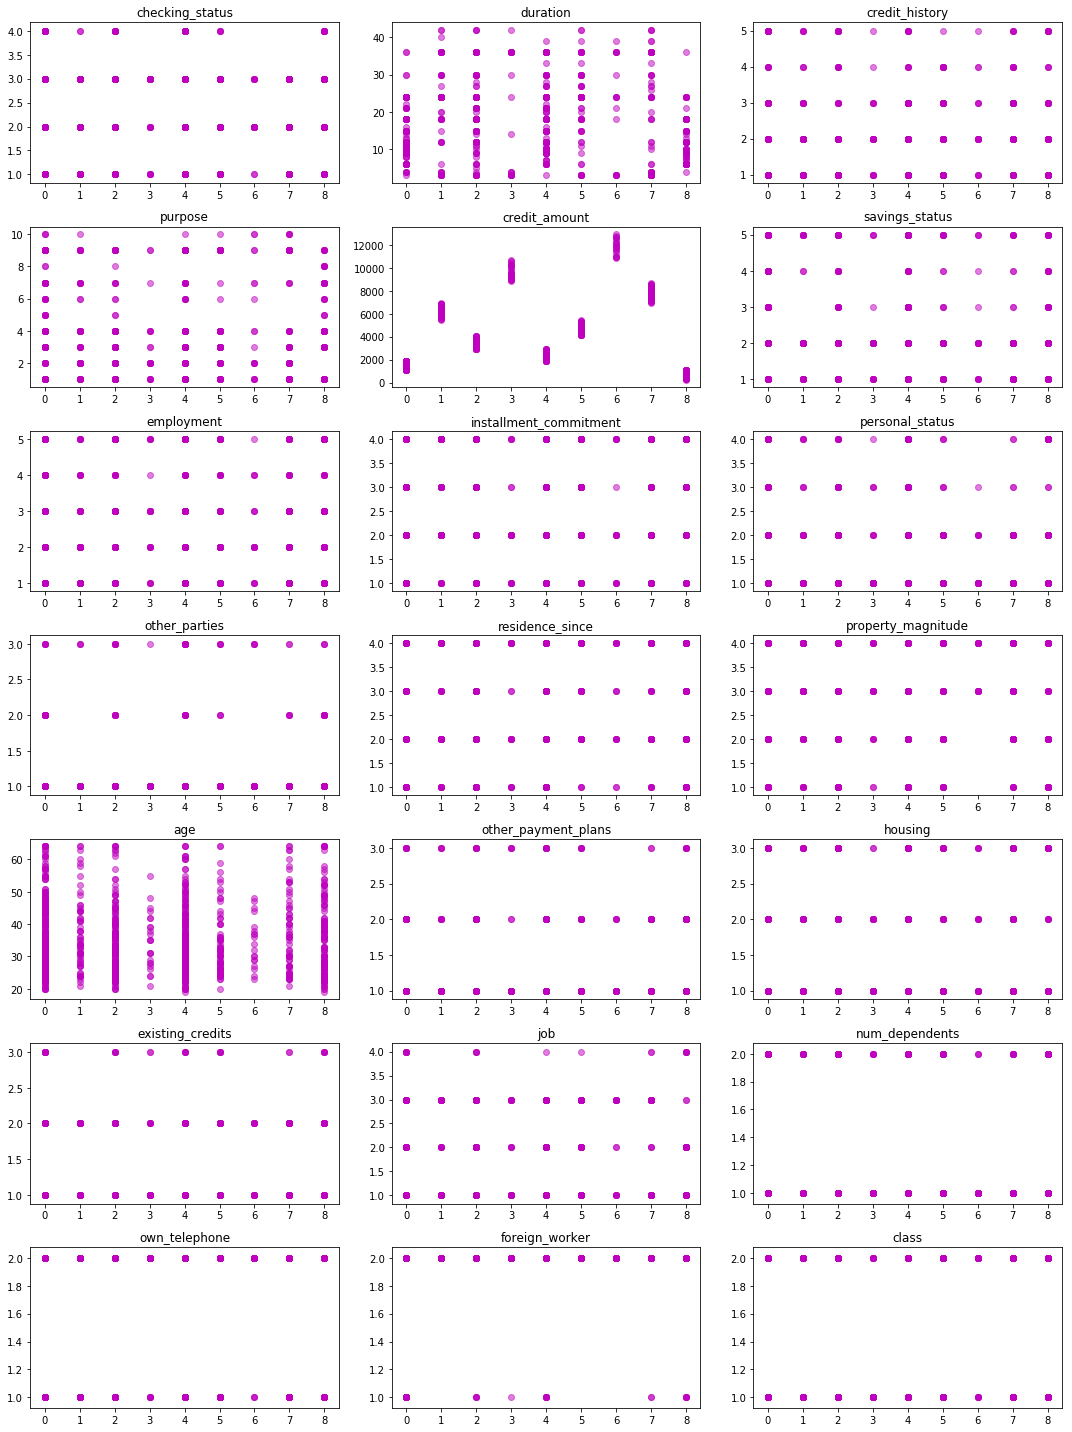

In [30]:
names = data.columns.values #Graficar las variables de la base de datos inicial contra los clusters encontrados para definirlos.
plt.figure(figsize=(15,20))
for i in range(1,len(names)+1):
    plt.subplot(7,3,i)
    plt.scatter(labels, data[names[i-1]],c='m',alpha=0.5)
    plt.title(names[i-1])
    
plt.tight_layout()

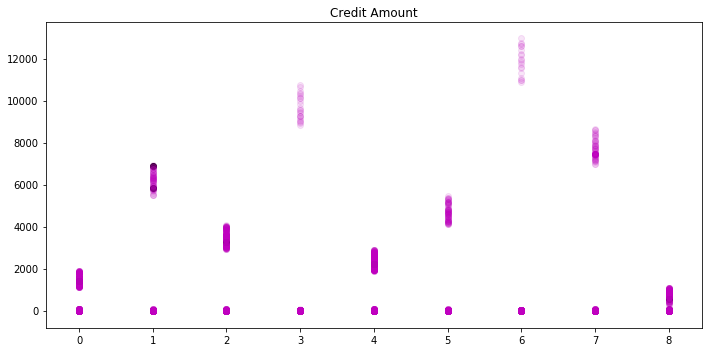

In [31]:
#Se encuentra una segmentación muy marcada en los clusters con respecto a la variables credit amount.
#Por esta razón se grafica esta variable junto con el valor de los datos de prueba, para verificar la clasifición de las variables en los clusters.
plt.figure(figsize=(10,5)) 
plt.scatter(y_pred, dataset['credit_amount'],c='k',alpha=1)
plt.title("Credit Amount")

for i in range(1,len(names)+1):
    plt.scatter(labels, data[names[i-1]],c='m',alpha=0.1)
    

plt.tight_layout()

#### Los clusters encontrados  

In [32]:
#El mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican grupos superpuestos. Los valores negativos generalmente indican que una muestra se ha asignado al grupo incorrecto, ya que un grupo diferente es más similar.
from sklearn.metrics import silhouette_samples, silhouette_score #Determinar el valor silhouette_avg 
silhouette_avg = silhouette_score(data, labels)
print("Para 9 clusters el silhouette_score es :", silhouette_avg)
#Se puede concluir con este valor que los clusters estan bien definidos ya no esta muy cercano a 0 ni negativo, lo que indica que no estan superpuestos, ni se han asignado muestras a un grupo incorrecto.

Para 9 clusters el silhouette_score es : 0.5502985091959244


Para un numero de clusters = 2 El average silhouette_score es : 0.7147782438657666
Para un numero de clusters = 4 El average silhouette_score es : 0.6145093797683041
Para un numero de clusters = 6 El average silhouette_score es : 0.5749058233438984
Para un numero de clusters = 8 El average silhouette_score es : 0.57768118364607
Para un numero de clusters = 9 El average silhouette_score es : 0.5534678168005713
Para un numero de clusters = 10 El average silhouette_score es : 0.578664049741675


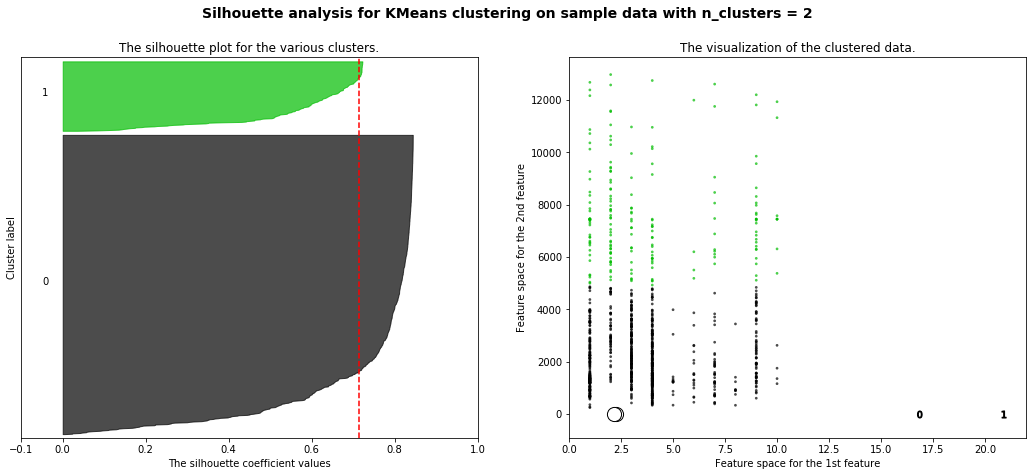

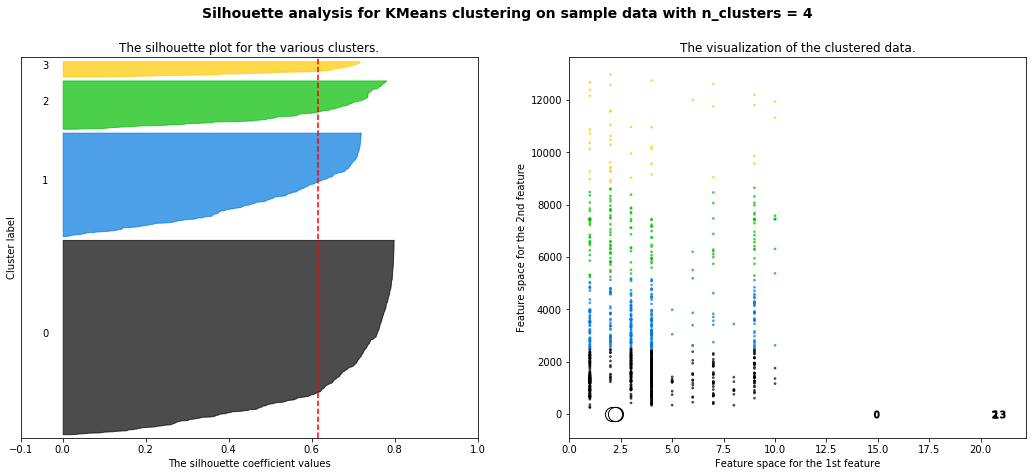

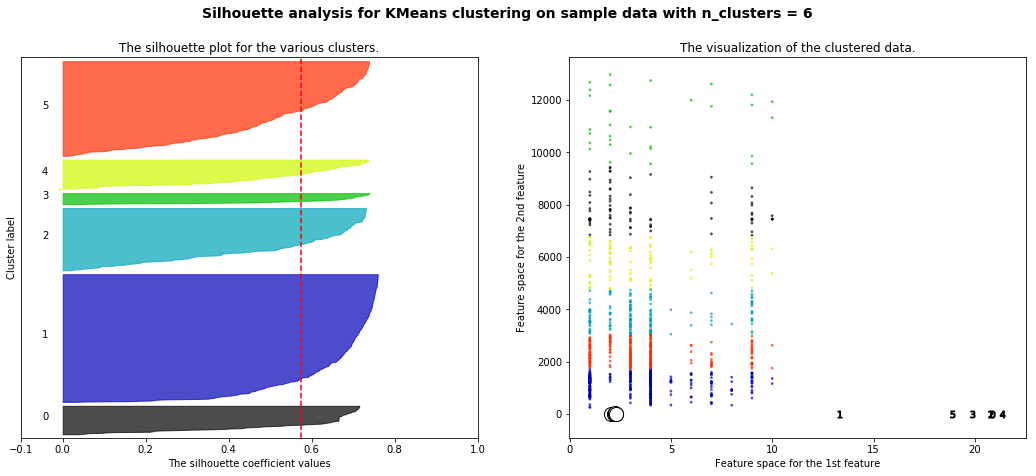

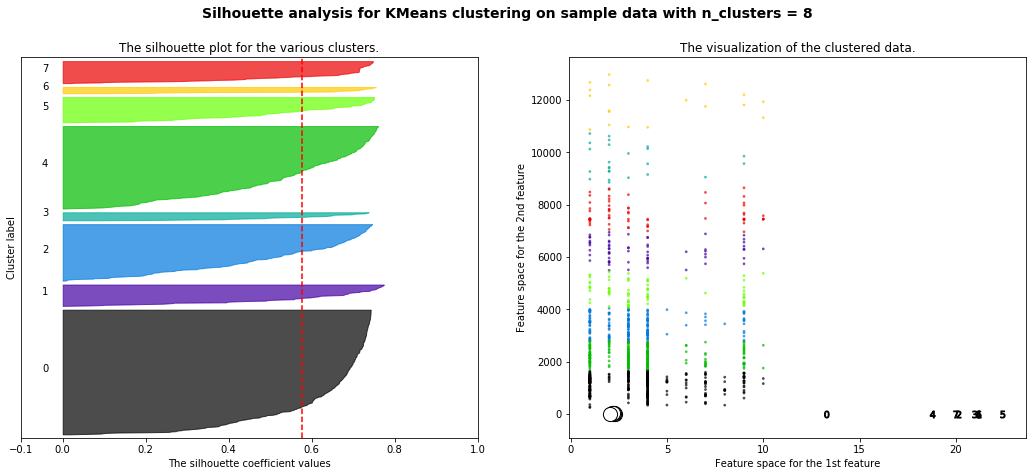

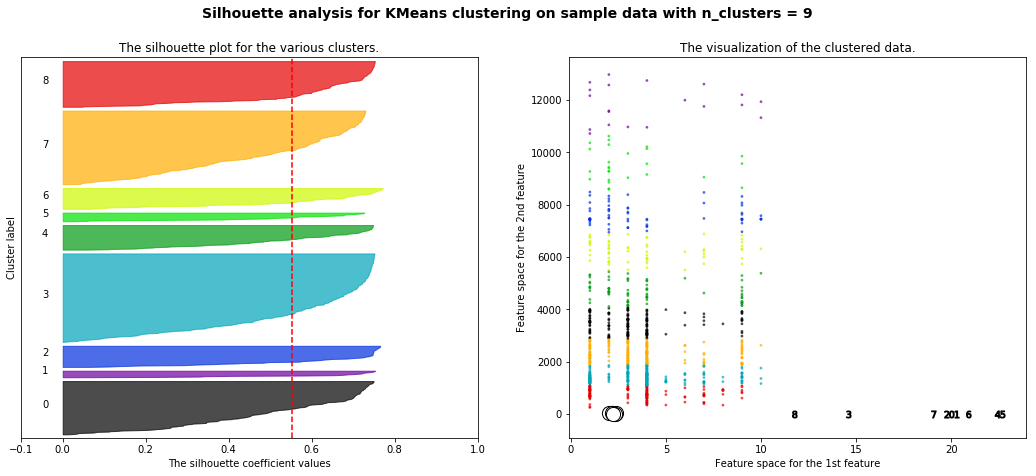

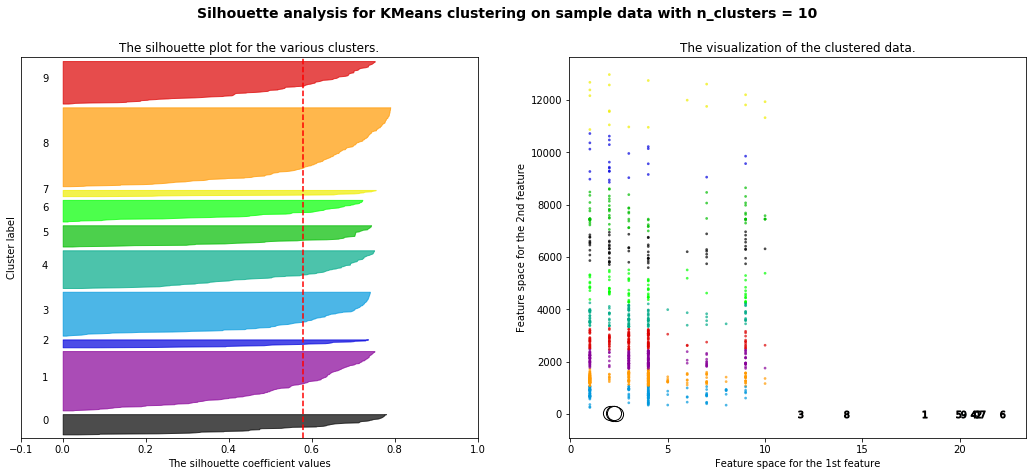

In [33]:
from __future__ import print_function
from sklearn.datasets import make_blobs
import matplotlib.cm as cm

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  

range_n_clusters = [2, 4, 6, 8, 9, 10] #Se define un vector con el numero de cluster a probar para definir con cual funciona mejor el metodo, tomando ocmo medida el silhouette_score.

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("Para un numero de clusters =", n_clusters,
          "El average silhouette_score es :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data['purpose'], data['credit_amount'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show() 
#El metodo funciona mejor con 2, 4 y 10 clusters.

### Metodo jerarquico

In [34]:
#Se grafica  el dendograma que permite definir el numero de cluster de acuerdo a un diagrama de arbol, mediante una linea sobre una distancia establecida.
from scipy.cluster.hierarchy import  dendrogram, linkage
Z = linkage(data, 'ward') # Generacion de la matriz de linkage

In [35]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
# Verificar el  Cophenetic Correlation Coefficient del cluster. Cuanto más cerca esté el valor de 1, mejor será el cluster.
c, coph_dists = cophenet(Z, pdist(data))
c #Se puede concluir que el cluster esta bien definido ya que el valor de c es un valor cercano a 1.

0.8407425967268486

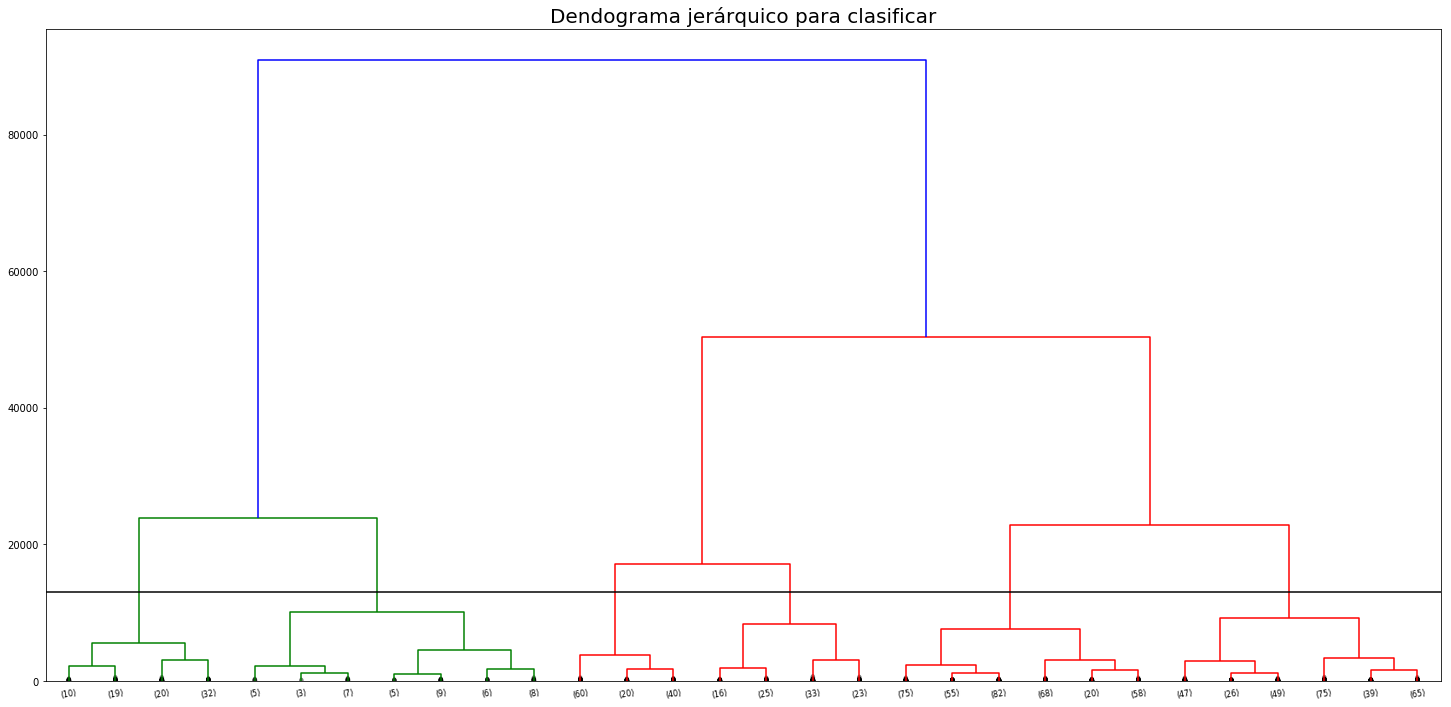

In [36]:
#Visualización en forma de un árbol que muestra el orden y las distancias de las fusiones durante la clusterizacion jerárquica.
plt.figure(figsize=(25, 12))
plt.title('Dendograma jerárquico para clasificar',fontsize=20)
max_d = 13000 #distancia definida para establecer el número de clusters,
den = dendrogram(
        Z,
        truncate_mode='lastp',
        leaf_rotation=10.,  
        leaf_font_size=8.,  
        show_contracted=True
    )
plt.axhline(y=max_d, c='k')
plt.show()

In [37]:
#importar la libreria para implemenetar el método Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6).fit(data) #De acuerdo al dendograma se definen 6 clusters.
labels2 = clustering.labels_ #Se obtienen los clusters para los datos del dataset inicial. 

In [38]:
silhouette_avg = silhouette_score(data, labels2) 
print("Para 6 clusters el silhouette_score es :", silhouette_avg)
#Se puede concluir con este valor que los clusters estan bien definidos ya no esta muy cercano a 0 ni negativo, lo que indica que no estan superpuestos, ni se han asignado muestras a un grupo incorrecto.

Para 6 clusters el silhouette_score es : 0.5572095490988233


In [39]:
#Se clasifican los datos del dataset de prueba con el modelo entrenado
y_pred2 = clustering.fit_predict(dataset) 
y_pred2

array([5, 3, 2, 4, 1, 0], dtype=int64)

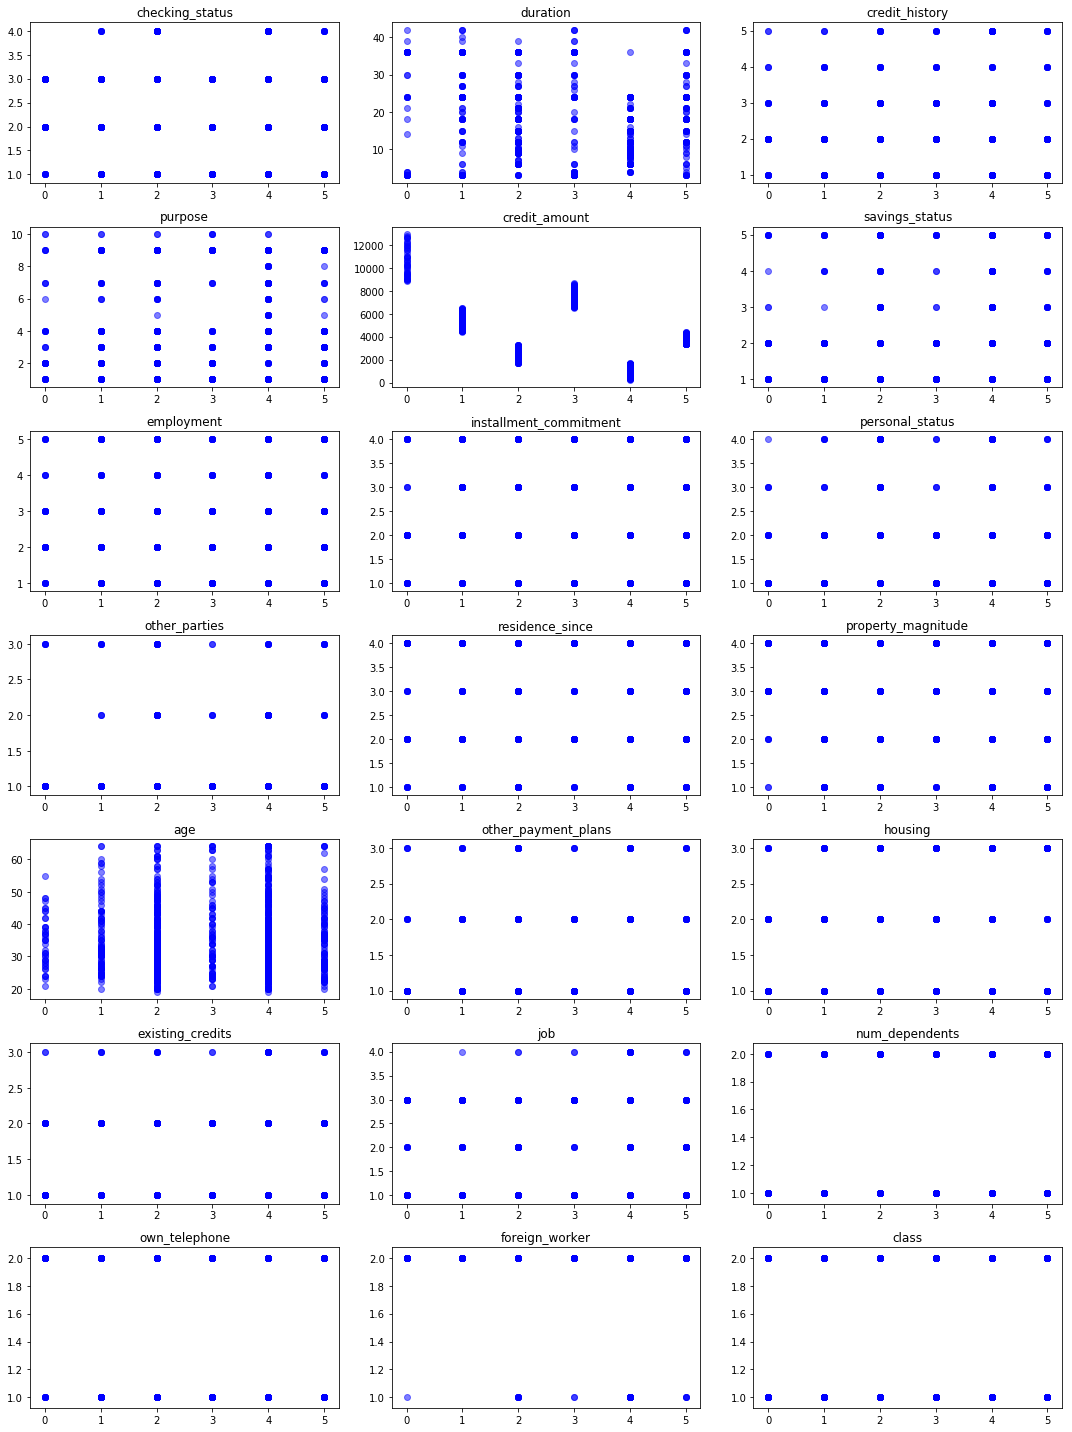

In [40]:
#Graficar las variables de la base de datos inicial contra los clusters encontrados para definirlos.
names = data.columns.values
plt.figure(figsize=(15,20))
for i in range(1,len(names)+1):
    plt.subplot(7,3,i)
    plt.scatter(labels2, data[names[i-1]],c='b',alpha=0.5)
    plt.title(names[i-1])
    
plt.tight_layout()

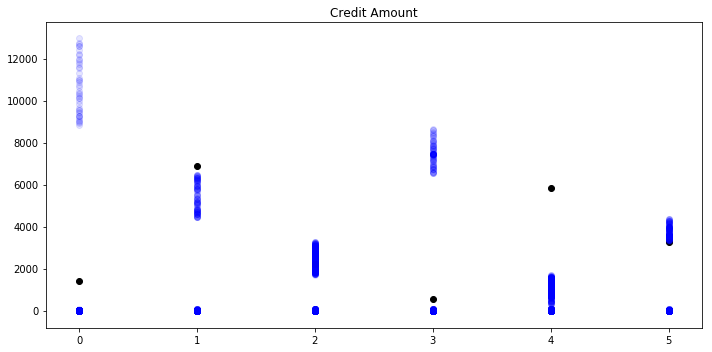

In [41]:
#Se encuentra una segmentación muy marcada en los clusters con respecto a la variables credit amount.
#Por esta razón se grafica esta variable junto con el valor de los datos de prueba, para verificar la clasifición de las variables en los clusters.
plt.figure(figsize=(10,5))
plt.scatter(y_pred2, dataset['credit_amount'],c='k',alpha=1)
plt.title("Credit Amount")

for i in range(1,len(names)+1):
    plt.scatter(labels2, data[names[i-1]],c='b',alpha=0.1)
    

plt.tight_layout()

Para n_clusters = 6 El average silhouette_score es : 0.5572095490988233


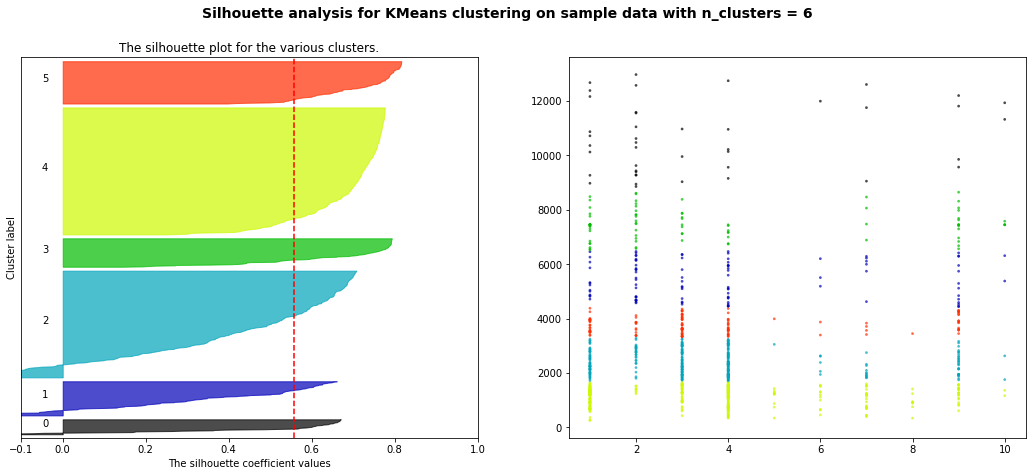

In [42]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  

range_n_clusters = [6]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=6)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El average silhouette_score es :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data['purpose'], data['credit_amount'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
#Se puede concluir con este valor que los clusters estan bien definidos ya no esta muy cercano a 0 ni negativo, lo que indica que no estan superpuestos, ni se han asignado muestras a un grupo incorrecto.

### EM – Expectation Maximization

In [43]:
#Importar la libreria Gaussian Mixture
from sklearn.mixture import GaussianMixture

In [44]:
cov_type = ['spherical', 'diag', 'tied', 'full'] ## Funcion para las elipses
GM = np.zeros(4)
labels3 = []
for i in range(len(cov_type)):
    GM = GaussianMixture(n_components=9,covariance_type=cov_type[i], max_iter=20, random_state=0).fit(data)
    labels3.append(GM.predict(data))

In [45]:
for j in range(len(labels3)):
    silhouette_avg = silhouette_score(data, labels3[j])
    print("Para 9 clusters el silhouette_score es {} con un cov_type de {} ".format(silhouette_avg,cov_type[j]))

#La elipse que mejor funciona es spherical con un silhouette_score de 0.545

Para 9 clusters el silhouette_score es 0.545166474100956 con un cov_type de spherical 
Para 9 clusters el silhouette_score es -0.4150611917823496 con un cov_type de diag 
Para 9 clusters el silhouette_score es 0.11576725946714043 con un cov_type de tied 
Para 9 clusters el silhouette_score es -0.5036294543948396 con un cov_type de full 


In [46]:
#Se clasifican los datos del dataset de prueba con el modelo entrenado
y_pred3 = GM.predict(dataset)
y_pred3

array([2, 7, 1, 1, 3, 2], dtype=int64)

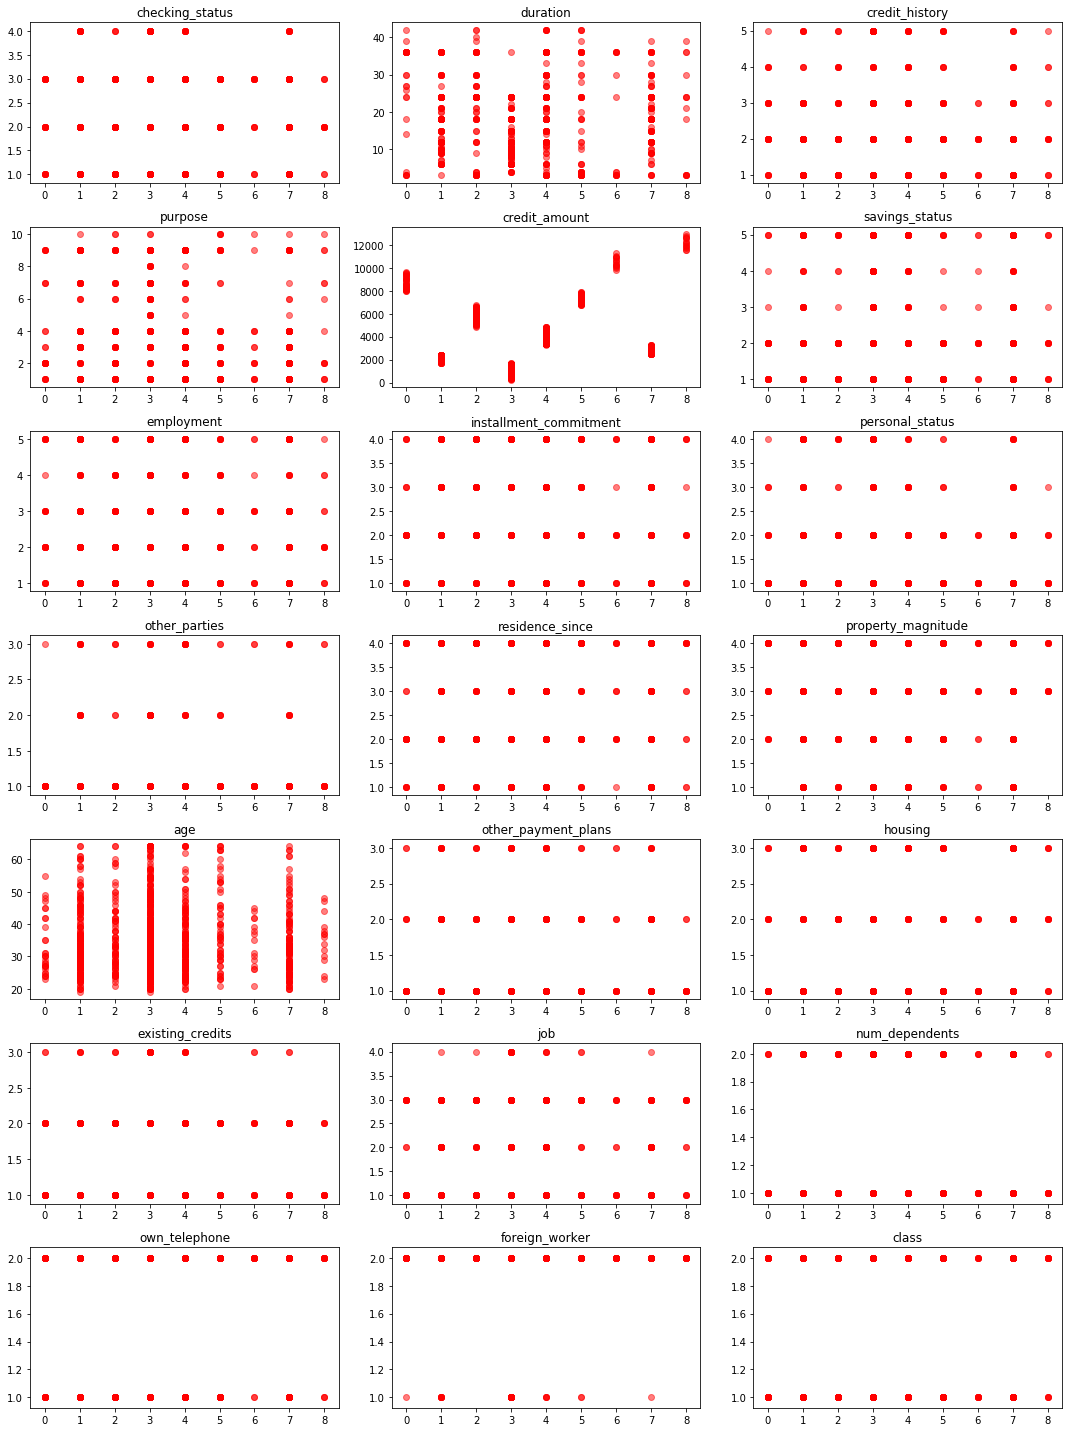

In [47]:
#Graficar las variables de la base de datos inicial contra los clusters encontrados para definirlos.
names = data.columns.values
plt.figure(figsize=(15,20))
for i in range(1,len(names)+1):
    plt.subplot(7,3,i)
    plt.scatter(labels3[0], data[names[i-1]],c='r',alpha=0.5) #Se elige labels3[0] porque es el modelo entrenado con la elipse spherical
    plt.title(names[i-1])
    
plt.tight_layout()

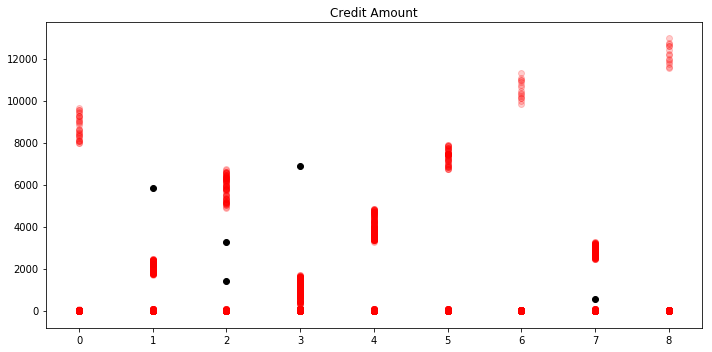

In [48]:
#Se encuentra una segmentación muy marcada en los clusters con respecto a la variables credit amount.
#Por esta razón se grafica esta variable junto con el valor de los datos de prueba, para verificar la clasifición de las variables en los clusters.
plt.figure(figsize=(10,5))
plt.scatter(y_pred3, dataset['credit_amount'],c='k',alpha=1)
plt.title("Credit Amount")

for i in range(1,len(names)+1):
    plt.scatter(labels3[0], data[names[i-1]],c='r',alpha=0.2)
    

plt.tight_layout()
#La clasificacion de los datos no se observa muy acertada teniendo en cuenta el valor del credit amount de los datos. Esto debido a que otros factores influyen en la clasificacion aunque el mencionado se reconozca mejor de manera visual.

Para n_clusters = 9 El average silhouette_score es : 0.545166474100956


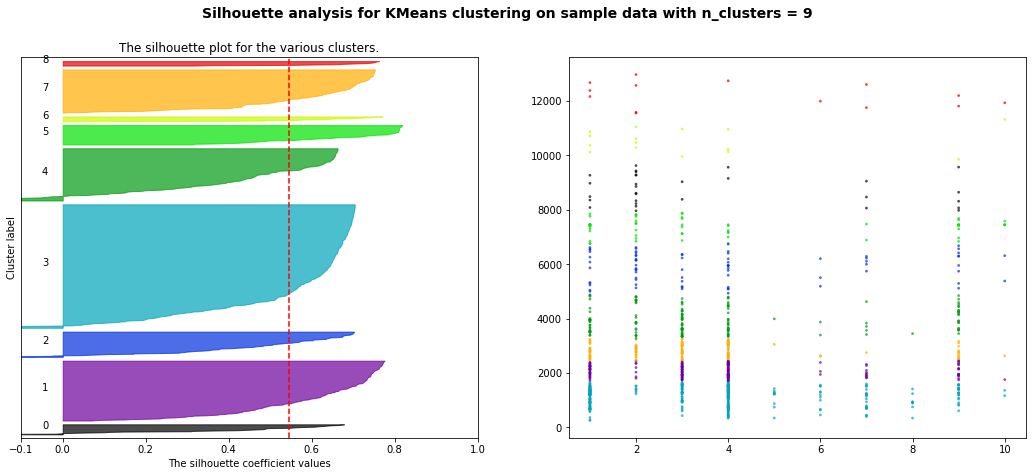

In [49]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

range_n_clusters = [9]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = GaussianMixture(n_components=9,covariance_type='spherical', max_iter=20, random_state=0)
    cluster = clusterer.fit(data)
    cluster_labels = cluster.predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El average silhouette_score es :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data['purpose'], data['credit_amount'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
#Se puede concluir con este valor que los clusters estan bien definidos ya no esta muy cercano a 0 ni negativo, lo que indica que no estan superpuestos, ni se han asignado muestras a un grupo incorrecto.

## Clusters
- En los clusters encontrados se puede encontar una relación de los datos en la variable credit amount, asimismo se observa una relacion con la duracion del credito y el proposito para el cual se solicitó dicho crédito. En algunos clusters influye un poco la edad del cliente. Por esta razón los cluster obtenidos en cada método se pueden clasificar como el proposito por el cual un cliente realiza un crédito, debido a que cada uno tienen un costo que varia en un rango y con ello la duración de acuerdo al monto a pagar.